# Demo project

- Data checking
    - Dataframe
    - Data describle
    - Data plot
- Data prepocessing
    - Scaling
    - fill NA
- Modeling
    - K-means
        - Decide K values
    - Using silhouette to evaluate the model

## loading package and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, scale
from datetime import datetime
# for file output name
today = datetime.today().strftime(format='%m%d')
# for excel format
import string
# os
from itertools import product
import os
# silhouette
from matplotlib import cm 
from sklearn.metrics import silhouette_samples 

# some config
%matplotlib inline

In [2]:
# loading data
data = pd.read_pickle('../data/sample_fields_clean.df')

In [3]:
# show the data 
data.head()

,@A_activeDay,@C_activeDay,@E_activeDay,@B_activeDay,@D_activeDay,@A_spending,@C_spending,@E_spending,@B_spending,@D_spending,@Special_spending
KeyID,,,,,,,,,,,
4,2.0,NaN,NaN,NaN,NaN,2401.0,NaN,NaN,NaN,NaN,822.0
5,2.0,NaN,NaN,6.0,4.0,1821.0,NaN,NaN,5675.0,2042.0,NaN
13,2.0,NaN,NaN,NaN,NaN,1062.0,NaN,NaN,NaN,NaN,NaN
14,2.0,NaN,NaN,3.0,NaN,3375.5,NaN,NaN,4677.5,NaN,NaN
17,117.0,NaN,NaN,1.0,NaN,7889.4,NaN,NaN,NaN,NaN,32510.0


## Checking data

In [4]:
# record and features numbers
data.shape

(23763, 11)

In [5]:
# how many missing data
data.isnull().sum() / data.size

@A_activeDay         0.041417
@C_activeDay         0.054466
@E_activeDay         0.064910
@B_activeDay         0.053192
@D_activeDay         0.060640
@A_spending          0.041883
@C_spending          0.059573
@E_spending          0.065698
@B_spending          0.054550
@D_spending          0.069221
@Special_spending    0.060120
dtype: float64

In [6]:
# how members no record
(data.isnull().sum(1) == data.shape[1]).sum()

3031

In [7]:
# checking unique
data['@A_activeDay'].unique()

array([   2.,  117.,    1.,   nan,   62.,    4.,    5.,   47.,   91.,
         23.,   12.,    3.,   32.,   21.,   11.,   22.,  299.,   13.,
         30.,  208.,   15.,    9.,   36.,   92.,    7.,   84.,   24.,
         55.,  320.,   49.,   44.,  242.,   77.,   29.,  192.,  149.,
         20.,   25.,    6.,   87.,    8.,   40.,   37.,   14.,   35.,
        143.,   31.,  330.,   38.,   93.,  281.,   69.,   16.,   65.,
         46.,   28.,   61.,   34.,  151.,   39.,  269.,   43.,  113.,
         82.,  142.,   18.,  178.,   59.,   10.,   58.,  112.,   71.,
         73.,  123.,   19.,  287.,  103.,   63.,   72.,   50.,  250.,
         56.,  102.,   75.,   57.,  166.,   17.,  137.,   79.,  207.,
        160.,   51.,   64.,   60.,  129.,  245.,  126.,  301.,  271.,
         68.,  227.,   41.,   95.,   88.,   33.,   81.,   27.,   98.,
        107.,  337.,  277.,   26.,  157.,  181.,   86.,  159.,  108.,
        138.,  243.,  305.,  246.,  201.,  100.,   90.,   53.,  180.,
        252.,  114.,

In [8]:
# data decrible
data.describe().T

,count,mean,std,min,25%,50%,75%,max
@A_activeDay,12937.0,3.989248e+01,5.791823e+01,1.0,5.000,16.0,49.000,366.0
@C_activeDay,9526.0,6.442473e+00,1.120095e+01,1.0,1.000,2.0,6.000,240.0
@E_activeDay,6796.0,6.822248e+00,1.743390e+01,1.0,1.000,2.0,5.000,352.0
@B_activeDay,9859.0,2.048402e+01,4.215596e+01,1.0,2.000,5.0,17.000,364.0
@D_activeDay,7912.0,1.016330e+01,1.505698e+01,1.0,1.000,3.0,11.000,84.0
@A_spending,12815.0,1.867259e+04,3.026847e+04,15.0,3260.250,9350.0,22910.650,1266530.4
@C_spending,8191.0,9.033512e+03,2.151073e+04,6.0,1384.500,3370.4,9046.500,1224073.0
@E_spending,6590.0,4.023950e+03,7.741221e+03,7.0,620.625,1737.5,4411.000,152822.0
@B_spending,9504.0,9.691435e+03,2.000148e+04,1.0,937.000,3223.0,9992.875,590707.2
@D_spending,5669.0,1.372655e+04,2.570864e+04,1.0,1670.000,4487.0,14141.000,402634.0


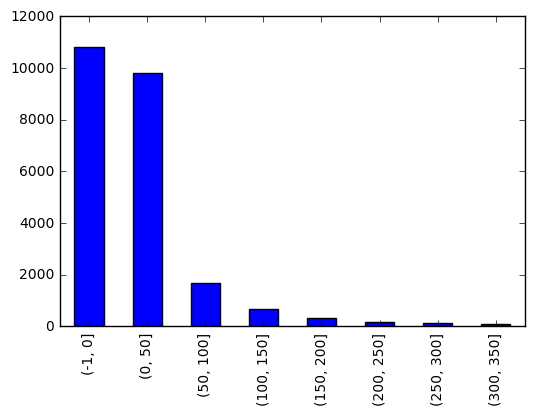

In [9]:
# plot the data
s = data['@A_activeDay'].fillna(0)
bins = [-1,] + list(range(0, int(s.max()), 50))
pd.cut(s, bins=bins).value_counts().plot(kind='Bar')

In [10]:
# data base 
# clear the dorment
clustering_base = data.dropna(axis=0, how='all').index

In [11]:
len(clustering_base)

20732

## Data prepocessing

In [12]:
# data min max scale
X = data.loc[clustering_base, :].fillna(0).values
X = MinMaxScaler().fit_transform(X)

In [13]:
# try find n for kmean
def get_K_val(X, n_try=9):
    distortions = [] 

    for i in range(1, n_try): 
        km = KMeans(n_clusters=i, 
                    init='k-means++', 
                    n_init=20, 
                    max_iter=300, 
                    random_state=0,
                    n_jobs=-1) 
        km.fit(X) 
        distortions.append(km.inertia_) 

    plt.plot(range(1, n_try), distortions, marker='o') 
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')

## Find the K for the Distortion drop most(the eblow spot)

For this instance, we may pick 3-5 according to the business understanding.

I pick K equal to 5

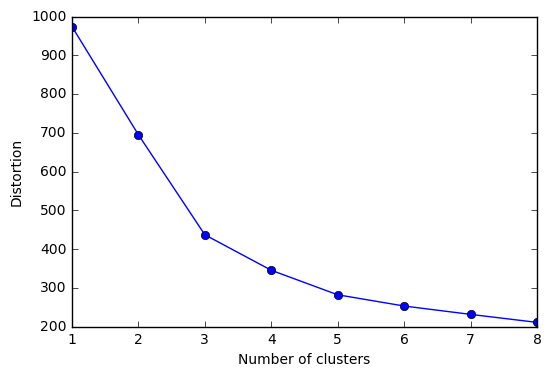

In [14]:
get_K_val(X=X, n_try=9)

In [15]:
# modelling
def kmean_modelling(X, n_cluster, ):
    """
    input: X, n_cluster
    return: model, labels, n_clusters_
    """
    km = KMeans(n_clusters=n_cluster, 
                init='k-means++', 
                n_init=20, # how many time run clustering, choose the best result
                max_iter=300, # how meany iterations
                n_jobs = -1,
                random_state=0).fit(X)
    labels = km.labels_
    print("n = %s, Silhouette Coefficient: %0.3f"
          % (n_cluster, metrics.silhouette_score(X, labels)), )
    
    return km, labels, n_cluster

In [16]:
km_4 , labels_4, n_clusers_4 = kmean_modelling(X, n_cluster=4)

n = 4, Silhouette Coefficient: 0.672


In [17]:
def plot_silhouette(X, labels):
    cluster_labels = np.unique(labels) 
    n_clusters = cluster_labels.shape[0] 
    silhouette_vals = silhouette_samples(X, labels, metric='euclidean') 
    y_ax_lower, y_ax_upper = 0, 0 
    yticks = [] 
    for i, c in enumerate(cluster_labels): 
         c_silhouette_vals = silhouette_vals[labels == c] 
         c_silhouette_vals.sort() 
         y_ax_upper += len(c_silhouette_vals)
         color = cm.jet(i / n_clusters) 
         plt.barh(range(y_ax_lower, y_ax_upper), 
                  c_silhouette_vals, 
                  height=1.0, 
                  edgecolor='none', 
                  color=color) 
         yticks.append((y_ax_lower + y_ax_upper) / 2) 
         y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals) 
    plt.axvline(silhouette_avg, 
                 color="red", 
                 linestyle="--") 
    plt.yticks(yticks, cluster_labels)
    plt.ylabel('Cluster') 
    plt.xlabel('Silhouette coefficient')
    return silhouette_vals

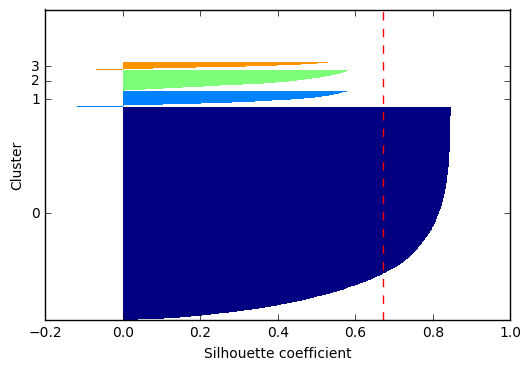

In [19]:
silhouette_vals = plot_silhouette(X, labels=labels_4)

In [23]:
# adding the label and silhouette_vals
data.loc[clustering_base, 'label'] = labels_4
data.loc[clustering_base, 'silhouette_vals'] = silhouette_vals

# labels add dormant
data['label'].fillna('Z.Dorment', inplace=1)

In [24]:
# get the actual cluster with dormat 
today = datetime.now().strftime(format="%m%d")
num_of_clusters = len(set(data.label))
info = 'kmean_demo'
def get_tables(data: pd.DataFrame, zero_as='zero'):
    #op dataset 
    data4 = data.dropna(how='all', axis=1)
    # no fillna
    if zero_as == 'zero':
        data4 = data4.fillna(0)
    table1 = data4.groupby('label').size().to_frame()
    table1.columns = ['counts']
    table1 = table1.T
    table1['oa'] = table1.sum(1)
    # adjust columns
    table1 = table1[['oa'] + list(table1.columns)[:-1]] 
    # add counts of cluster
    table2 = data4.groupby('label').mean().T
    table2['oa'] = data4.mean()
    table = table1.append(table2)
    # adjust columns
    # mean table and count table
    count_table = data4.groupby('label').agg(lambda x: np.count_nonzero(x.fillna(0))).T
    count_table_oa = data4.apply(lambda x: np.count_nonzero(x.fillna(0))).T
    count_table['oa'] = count_table_oa
    # adjust columns
    count_table = count_table[['oa'] + list(count_table.columns)[:-1]]
    # oa counts of members
    oa_counts = data4.groupby('label').size()
    oa_counts['oa'] = oa_counts.sum()
    table_count_percentage = count_table / oa_counts
    # get columns name
    table_count_percentage.columns = 'counts_perc_' + table_count_percentage.columns.astype(str)
    count_table.columns = 'counts_' + count_table.columns.astype(str)
    # join table
    table = table.join(table_count_percentage)
    table = table.join(count_table)
    # op dataset 
    table.to_excel('../op/cluster_mean_table_n{}_{}_{}_{}.xlsx'.format(num_of_clusters, today, info, zero_as))
    if zero_as != 'zero':
        data.to_pickle('../op/dataset_n{}_{}_{}_{}.df'.format(num_of_clusters, today, info, zero_as))
        data.to_csv('../op/dataset_n{}_{}_{}_{}.csv'.format(num_of_clusters, today, info, zero_as))
    return table.shape

# get the dataframe size for formating
rows, cols = get_tables(data, zero_as='nan')

# setting the row col niumber for vba
number_of_row = rows + 1
mean_format_s, mean_format_e =  int(cols / 3) + 1 - num_of_clusters + 1  , int(cols / 3) + 1
count_format_s, count_format_e =  2 * int(cols / 3) + 1 - num_of_clusters + 1  , 2 * int(cols / 3) + 1
font_format_e = cols + 1
# convert to char
excel_column_names = (list(string.ascii_uppercase) + [x[0] + x[1] for x in list(product(string.ascii_uppercase, repeat=2))])
font_format_e_char = excel_column_names[font_format_e - 1]
mean_format_e_char = excel_column_names[mean_format_e - 1]
count_format_s_char = excel_column_names[count_format_s - 2]
count_format_e_char = excel_column_names[count_format_e - 1]

vba_format = \
"""
Sub condition_color()
'condition_color
'make condiction format
    Application.ScreenUpdating = False
    Dim i As Integer
    i = 3
    Do While i <= {number_of_row}
        'mean of clustering
        Range(Cells(i, {mean_format_s}), Cells(i, {mean_format_e})).Select
        Selection.FormatConditions.AddColorScale ColorScaleType:=2
        Selection.FormatConditions(Selection.FormatConditions.Count).SetFirstPriority
        Selection.FormatConditions(1).ColorScaleCriteria(1).Type = _
            xlConditionValueLowestValue
        With Selection.FormatConditions(1).ColorScaleCriteria(1).FormatColor
            .Color = 16776444
            .TintAndShade = 0
        End With
        Selection.FormatConditions(1).ColorScaleCriteria(2).Type = _
            xlConditionValueHighestValue
        With Selection.FormatConditions(1).ColorScaleCriteria(2).FormatColor
            .Color = 8109667
            .TintAndShade = 0
        End With
        'percentage color format, non include oa
        Range(Cells(i, {count_format_s}), Cells(i, {count_format_e})).Select
        Selection.FormatConditions.AddColorScale ColorScaleType:=2
        Selection.FormatConditions(Selection.FormatConditions.Count).SetFirstPriority
        Selection.FormatConditions(1).ColorScaleCriteria(1).Type = _
            xlConditionValueLowestValue
        With Selection.FormatConditions(1).ColorScaleCriteria(1).FormatColor
            .Color = 16776444
            .TintAndShade = 0
        End With
        Selection.FormatConditions(1).ColorScaleCriteria(2).Type = _
            xlConditionValueHighestValue
        With Selection.FormatConditions(1).ColorScaleCriteria(2).FormatColor
            .Color = 7039480
            .TintAndShade = 0
        End With
        i = i + 1
    Loop

'make left line and number format
    Columns(1).Select
    With Selection
        .HorizontalAlignment = xlLeft
        .WrapText = False
        .Orientation = 0
        .AddIndent = False
        .IndentLevel = 0
        .ShrinkToFit = False
        .ReadingOrder = xlContext
        .MergeCells = False
    End With
    'mean digital format
    Columns("B:{mean_format_e_char}").Select
    Selection.NumberFormat = "#,##0.0"
    'all columns type
    Columns("A:{font_format_e_char}").Select
    Selection.Font.Name = "Calibri"
    'percent %
    Columns("{count_format_s_char}:{count_format_e_char}").Select
    Selection.Style = "Percent"
    Selection.NumberFormatLocal = "0.0%"
    Rows(2).Select
    Selection.NumberFormatLocal = "0"
    Rows(1).Select
    Selection.WrapText = True
    Rows(2).Select
    Selection.Font.Bold = True
    Application.ScreenUpdating = True
End Sub
""".format(number_of_row = number_of_row, 
           mean_format_s = mean_format_s,
           mean_format_e = mean_format_e,
           count_format_s = count_format_s,
           count_format_e = count_format_e,
           mean_format_e_char = mean_format_e_char,
           font_format_e_char = font_format_e_char,
           count_format_s_char = count_format_s_char,
           count_format_e_char = count_format_e_char, )
print(vba_format)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4513: RuntimeWarning: unorderable types: str() > int(), sort order is undefined for incomparable objects
  return_indexers=True)



Sub condition_color()
'condition_color
'make condiction format
    Application.ScreenUpdating = False
    Dim i As Integer
    i = 3
    Do While i <= 15
        'mean of clustering
        Range(Cells(i, 3), Cells(i, 7)).Select
        Selection.FormatConditions.AddColorScale ColorScaleType:=2
        Selection.FormatConditions(Selection.FormatConditions.Count).SetFirstPriority
        Selection.FormatConditions(1).ColorScaleCriteria(1).Type = _
            xlConditionValueLowestValue
        With Selection.FormatConditions(1).ColorScaleCriteria(1).FormatColor
            .Color = 16776444
            .TintAndShade = 0
        End With
        Selection.FormatConditions(1).ColorScaleCriteria(2).Type = _
            xlConditionValueHighestValue
        With Selection.FormatConditions(1).ColorScaleCriteria(2).FormatColor
            .Color = 8109667
            .TintAndShade = 0
        End With
        'percentage color format, non include oa
        Range(Cells(i, 9), Cells(i, 13)).S